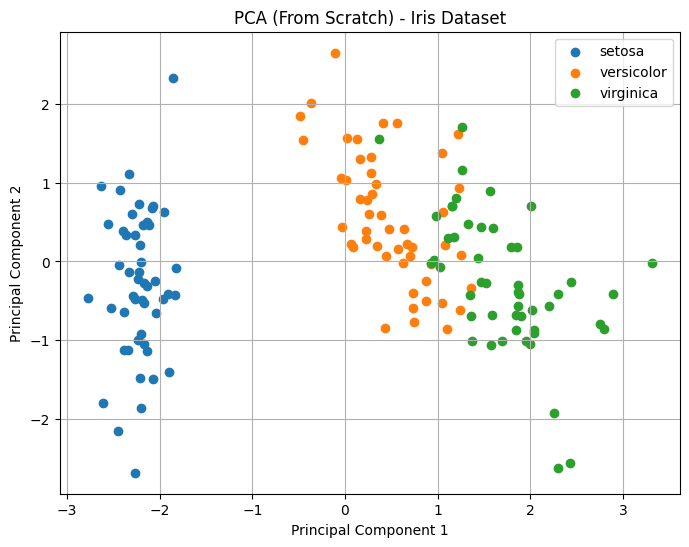

In [1]:
# Question 1: Implementing Principal Component Analysis (PCA) in Python
# Description: Implement PCA in Python using a dataset to reduce its dimensions and visualize the results.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data  
y = iris.target  
target_names = iris.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cov_matrix = np.cov(X_scaled.T)

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_idx]
eig_vecs = eig_vecs[:, sorted_idx]

n_components = 2
eig_vecs_subset = eig_vecs[:, :n_components]

X_reduced_manual = X_scaled @ eig_vecs_subset

plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_reduced_manual[y == i, 0], X_reduced_manual[y == i, 1], label=target_name)

plt.title("PCA (From Scratch) - Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()
